# 1. Install Dependencies and Setup

In [46]:
!pip install tensorflow 


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
alabaster                          0.7.12


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.8.3
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.0.2
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.4
Babel                              2.8.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.2.0
beautifulsoup4                     4.9.3
bitarray                           1.6.1
bkcharts                           0.2
bleach                             3.2.1
bokeh       

In [5]:
import tensorflow as tf
import os

QDarkStyle                         2.8.1
QtAwesome                          1.0.1
qtconsole                          4.7.7
QtPy                               1.9.0
regex                              2020.10.15
requests                           2.24.0
requests-oauthlib                  1.3.1
rope                               0.18.0
rsa                                4.9
Rtree                              0.9.4
ruamel_yaml                        0.15.87
schema                             0.6.7
scikit-image                       0.17.2
scikit-learn                       0.23.2
scipy                              1.10.1
seaborn                            0.11.0
Send2Trash                         1.5.0
setuptools                         50.3.1.post20201107
simplegeneric                      0.8.1
singledispatch                     3.4.0.3
sip                                4.19.13
six                                1.15.0
snowballstemmer                    2.0.0
sortedcollections          

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# 2. Remove dodgy images

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

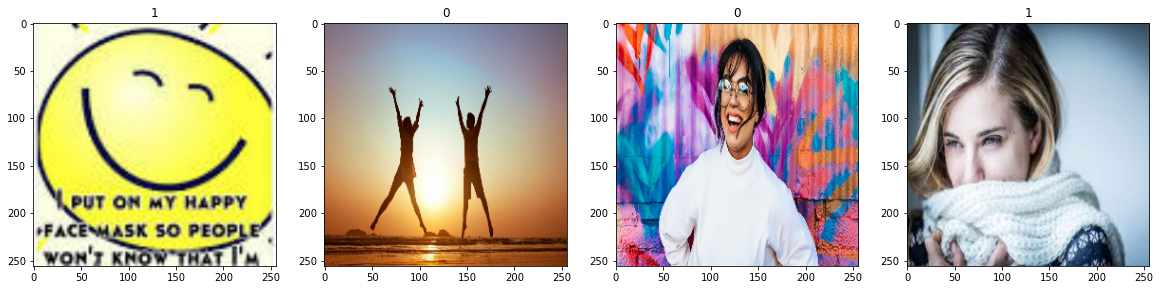

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.49019608, 0.84705883],
          [0.        , 0.49063265, 0.8474954 ],
          [0.        , 0.49411765, 0.8509804 ],
          ...,
          [0.        , 0.4862745 , 0.8392157 ],
          [0.        , 0.4897595 , 0.8322457 ],
          [0.        , 0.49019608, 0.83137256]],
 
         [[0.        , 0.49019608, 0.84705883],
          [0.        , 0.49063265, 0.8474954 ],
          [0.        , 0.49411765, 0.8509804 ],
          ...,
          [0.        , 0.4862745 , 0.8400485 ],
          [0.        , 0.4897595 , 0.8322457 ],
          [0.        , 0.49019608, 0.83137256]],
 
         [[0.        , 0.491322  , 0.84818476],
          [0.        , 0.4916332 , 0.84849596],
          [0.        , 0.49432653, 0.8511893 ],
          ...,
          [0.        , 0.48740044, 0.8417969 ],
          [0.        , 0.48988485, 0.83537275],
          [0.        , 0.49019608, 0.8347503 ]],
 
         ...,
 
         [[0.44776976, 0.50521463, 0.21105519],
          [0.46452

# 5. Split Data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

7

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))

model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 26s 3s/step - loss: 1.1226 - accuracy: 0.5268 - val_loss: 0.6466 - val_accuracy: 0.5156
Epoch 2/20
7/7 [==============================] - 21s 3s/step - loss: 0.6122 - accuracy: 0.6607 - val_loss: 0.6707 - val_accuracy: 0.6562
Epoch 3/20
7/7 [==============================] - 23s 3s/step - loss: 0.5471 - accuracy: 0.7366 - val_loss: 0.5679 - val_accuracy: 0.7031
Epoch 4/20
7/7 [==============================] - 20s 3s/step - loss: 0.5246 - accuracy: 0.7500 - val_loss: 0.3767 - val_accuracy: 0.9219
Epoch 5/20
7/7 [==============================] - 21s 3s/step - loss: 0.4508 - accuracy: 0.8304 - val_loss: 0.4524 - val_accuracy: 0.7656
Epoch 6/20
7/7 [==============================] - 20s 3s/step - loss: 0.3314 - accuracy: 0.8884 - val_loss: 0.2526 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 21s 3s/step - loss: 0.2226 - accuracy: 0.9330 - val_loss: 0.1442 - val_accuracy: 0.9688
Epoch 8/20
7/7 [==================

# 8. Plot Performance

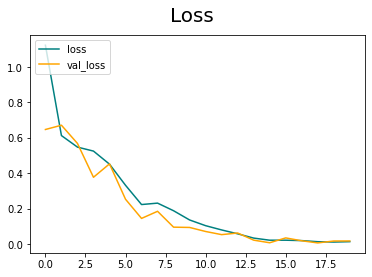

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

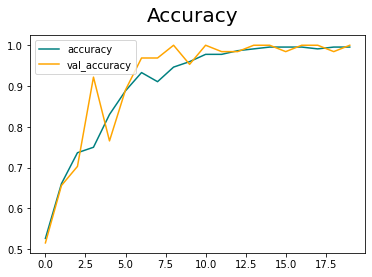

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 739ms/step


In [35]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [36]:
import cv2

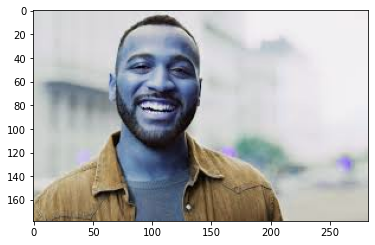

In [71]:
img = cv2.imread('Happy.jpg')
plt.imshow(img)
plt.show()

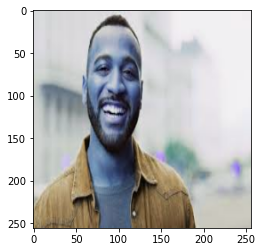

In [72]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 397ms/step


In [74]:
yhat

array([[0.06094217]], dtype=float32)

In [75]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [65]:
from tensorflow.keras.models import load_model

In [66]:
model.save(os.path.join('models','imageclassifier.h5'))

In [67]:
new_model = load_model('models/imageclassifier.h5')

In [56]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 238ms/step


array([[0.9999958]], dtype=float32)